In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.model_selection import GridSearchCV
import graphviz 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, export_text
import graphviz  
from sklearn.tree import export_graphviz

import sklearn

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv("Datasets/KenPom Barttorvik.csv")
df['WINS'] = (df.ROUND==32) + 2*(df.ROUND==16)+ 3*(df.ROUND==8) + 4*(df.ROUND==4)+5*(df.ROUND==2)+6*(df.ROUND==1)
df['SEED2'] = df['SEED']**2
df

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK,WINS,SEED2
0,2024,MAC,17,61,1,1079,2,Akron,14,64,...,199,19,176,164,47,122,51,249,0,196
1,2024,SEC,28,63,3,1078,3,Alabama,4,4,...,8,156,106,10,314,2,263,7,4,16
2,2024,P12,24,63,3,1077,8,Arizona,2,16,...,37,196,7,195,134,8,14,47,2,4
3,2024,SEC,28,64,4,1076,12,Auburn,4,64,...,76,127,69,59,284,12,8,69,0,16
4,2024,B12,7,63,3,1075,14,Baylor,3,32,...,22,304,34,97,254,15,155,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2008,BE,8,1,1,5,235,West Virginia,7,16,...,115,181,61,209,16,22,32,49,2,49
1075,2008,SB,26,1,1,4,236,Western Kentucky,12,16,...,179,55,131,127,214,27,28,203,2,144
1076,2008,BSth,10,4,4,3,239,Winthrop,13,64,...,206,89,236,339,190,170,12,179,0,169
1077,2008,B10,6,3,3,2,240,Wisconsin,3,16,...,35,98,12,118,117,60,2,57,2,9


In [3]:
df.shape

(1079, 105)

In [4]:
df_train = df[df['YEAR'] != 2024]
df_train = df_train[df_train['ROUND'] != 68]
df_test = df[df['YEAR'] == 2024]
df_test = df_test[df_test['ROUND'] != 68]


In [5]:
X_train = df_train.drop(['TEAM', 'CONF','CONF ID','QUAD NO', 'QUAD ID','TEAM NO','TEAM ID','ROUND','YEAR','ROUND', 'WINS'], axis=1)
y_train = df_train['WINS']
X_test = df_test.drop(['TEAM', 'CONF','CONF ID','QUAD NO', 'QUAD ID','TEAM NO','TEAM ID','ROUND','YEAR','ROUND', 'WINS'], axis=1)  
y_test = df_test['WINS']

In [6]:
X_train.columns

Index(['SEED', 'K TEMPO', 'K TEMPO RANK', 'KADJ T', 'KADJ T RANK', 'K OFF',
       'KO RANK', 'KADJ O', 'KADJ O RANK', 'K DEF', 'KD RANK', 'KADJ D',
       'KADJ D RANK', 'KADJ EM', 'KADJ EM RANK', 'BADJ EM', 'BADJ O', 'BADJ D',
       'BARTHAG', 'GAMES', 'W', 'L', 'WIN%', 'EFG%', 'EFG%D', 'FTR', 'FTRD',
       'TOV%', 'TOV%D', 'OREB%', 'DREB%', 'OP OREB%', 'OP DREB%', 'RAW T',
       '2PT%', '2PT%D', '3PT%', '3PT%D', 'BLK%', 'BLKED%', 'AST%', 'OP AST%',
       '2PTR', '3PTR', '2PTRD', '3PTRD', 'BADJ T', 'AVG HGT', 'EFF HGT', 'EXP',
       'TALENT', 'FT%', 'OP FT%', 'PPPO', 'PPPD', 'ELITE SOS', 'WAB',
       'BADJ EM RANK', 'BADJ O RANK', 'BADJ D RANK', 'BARTHAG RANK',
       'EFG% RANK', 'EFGD% RANK', 'FTR RANK', 'FTRD RANK', 'TOV% RANK',
       'TOV%D RANK', 'OREB% RANK', 'DREB% RANK', 'OP OREB% RANK',
       'OP DREB% RANK', 'RAW T RANK', '2PT% RANK', '2PT%D RANK', '3PT% RANK',
       '3PT%D RANK', 'BLK% RANK', 'BLKED% RANK', 'AST% RANK', 'OP AST% RANK',
       '2PTR RANK', '3PTR RA

In [7]:
# grid = {'max_depth':np.arange(1,10)}
# dtree = DecisionTreeRegressor()
# treeCV = GridSearchCV(dtree,param_grid=grid,return_train_score=True)
# treeCV.fit(X_train,y_train)
# print('best tree depth =',treeCV.best_params_, '  valid error rate =', (1 - treeCV.best_score_).round(3))

In [8]:
dtree = DecisionTreeRegressor(max_depth=2)
dtree.fit(X_train,y_train)
dtree.score(X_train,y_train)

0.3898106504707102

In [9]:
dtree.score(X_test,y_test)

0.4055481228118516

In [10]:
yh_test = dtree.predict(X_test)
predictions_df = pd.DataFrame({'TEAM':df_test['TEAM'],'Target':y_test, 'Predicted':yh_test})
predictions_df

,TEAM,Target,Predicted
0,Akron,0,0.154167
1,Alabama,4,0.748401
2,Arizona,2,1.942857
3,Auburn,0,1.942857
4,Baylor,1,1.942857
...,...,...,...
63,Wagner,0,0.154167
64,Washington St.,1,0.748401
65,Western Kentucky,0,0.154167
66,Wisconsin,0,0.748401


In [11]:
predictions_df['MSE'] = (predictions_df['Target']-predictions_df['Predicted'])**2
predictions_df.sort_values(by='MSE')

,TEAM,Target,Predicted,MSE
41,North Carolina,2,1.942857,0.003265
2,Arizona,2,1.942857,0.003265
32,Marquette,2,1.942857,0.003265
26,Iowa St.,2,1.942857,0.003265
0,Akron,0,0.154167,0.023767
...,...,...,...,...
16,Duke,3,0.748401,5.069699
7,Clemson,3,0.748401,5.069699
12,Connecticut,6,3.634146,5.597264
42,North Carolina St.,4,0.748401,10.572897


In [12]:
predictions_df.sort_values(by='Predicted',ascending=False)

,TEAM,Target,Predicted,MSE
46,Purdue,5,3.634146,1.865556
12,Connecticut,6,3.634146,5.597264
23,Houston,2,3.634146,2.670434
55,Tennessee,3,1.942857,1.117551
26,Iowa St.,2,1.942857,0.003265
...,...,...,...,...
30,Long Beach St.,0,0.154167,0.023767
21,Grambling St.,0,0.154167,0.023767
9,College of Charleston,0,0.154167,0.023767
8,Colgate,0,0.154167,0.023767


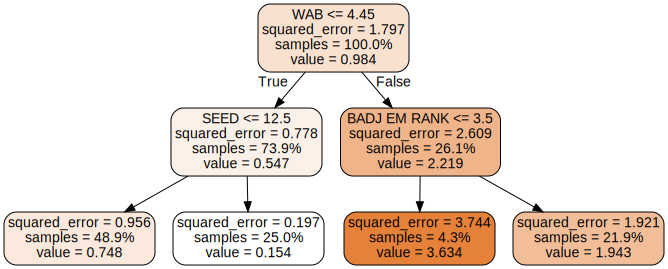

In [13]:
dot_data = export_graphviz(dtree,
                           out_file=None,
                           feature_names=X_train.columns,
                           proportion=True,
                           impurity=True,
                           filled=True,
                           rounded=True)
graph = graphviz.Source(dot_data)
graph

In [14]:
importances = pd.Series(dtree.feature_importances_,index = X_train.columns)
importances.sort_values(ascending=False)

WAB              0.770676
BADJ EM RANK     0.145942
SEED             0.083381
EFG% RANK        0.000000
OP OREB% RANK    0.000000
                   ...   
OREB%            0.000000
TOV%D            0.000000
TOV%             0.000000
FTRD             0.000000
SEED2            0.000000
Length: 95, dtype: float64

In [15]:
# grid = {'max_depth':[1,2,3,4,5,6,7,8,10,15,20],'n_estimators':[100,200,500,1000,1500,2000]}
# rfr = RandomForestRegressor()
# rfrCV = GridSearchCV(rfr,param_grid=grid,n_jobs=-1)
# rfrCV.fit(X_train,y_train)
# print('Random Forest Regressor:')
# print(' Optimal Parameters:',rfrCV.best_params_)
# print(' Optimal Valid R2 =',rfrCV.best_score_)

In [16]:
rfr = RandomForestRegressor(max_depth=2, n_estimators=100)
rfr.fit(X_train,y_train)
print(rfr.score(X_train, y_train))
rfr.score(X_test, y_test)

0.42474368167495535


0.4130070431358642

In [17]:
yh_test = rfr.predict(X_test)
predictions_df = pd.DataFrame({'TEAM':df_test['TEAM'],'Target':y_test, 'Predicted':yh_test})
predictions_df

,TEAM,Target,Predicted
0,Akron,0,0.226159
1,Alabama,4,0.957733
2,Arizona,2,2.238602
3,Auburn,0,2.354000
4,Baylor,1,1.823569
...,...,...,...
63,Wagner,0,0.226159
64,Washington St.,1,0.756848
65,Western Kentucky,0,0.226159
66,Wisconsin,0,0.857938


In [18]:
predictions_df['MSE'] = (predictions_df['Target']-predictions_df['Predicted'])**2
predictions_df.sort_values(by='MSE')

,TEAM,Target,Predicted,MSE
41,North Carolina,2,2.011845,0.000140
32,Marquette,2,1.975589,0.000596
28,Kansas,1,1.083973,0.007051
34,Michigan St.,1,0.816904,0.033524
56,Texas,1,0.812617,0.035113
...,...,...,...,...
7,Clemson,3,0.804717,4.819266
12,Connecticut,6,3.690910,5.331897
3,Auburn,0,2.354000,5.541318
1,Alabama,4,0.957733,9.255390


In [19]:
predictions_df.sort_values(by='Predicted',ascending=False)

,TEAM,Target,Predicted,MSE
12,Connecticut,6,3.690910,5.331897
23,Houston,2,3.626444,2.645321
46,Purdue,5,3.468203,2.346403
3,Auburn,0,2.354000,5.541318
26,Iowa St.,2,2.279416,0.078073
...,...,...,...,...
63,Wagner,0,0.226159,0.051148
21,Grambling St.,0,0.226159,0.051148
65,Western Kentucky,0,0.226159,0.051148
8,Colgate,0,0.226159,0.051148


In [20]:
importances = pd.Series(rfr.feature_importances_,index = X_train.columns)
importances.sort_values(ascending=False)

WAB             0.557386
SEED2           0.079021
BADJ EM         0.067899
BARTHAG         0.066524
BADJ EM RANK    0.064762
                  ...   
3PT%            0.000000
2PT%D           0.000000
2PT%            0.000000
RAW T           0.000000
AVG HGT         0.000000
Length: 95, dtype: float64

In [21]:
# grid = {'learning_rate':[0.001,0.05,0.01,0.1,1],'n_estimators':[100,200,500,1000,1500,2000],'max_depth':[1,2,3,4,5,6,7,8,10,15,20]}
# gbt = GradientBoostingRegressor()
# gbtCV = GridSearchCV(gbt,param_grid=grid,n_jobs=-1)
# gbtCV.fit(X_train, y_train)
# print('Gradient Boosting Trees:')
# print(' Optimal Parameters:',gbtCV.best_params_)
# print(' Optimal Valid R2 =',gbtCV.best_score_)

In [29]:
gbt = GradientBoostingRegressor(max_depth=4, n_estimators=500, learning_rate=0.01)
gbt.fit(X_train,y_train)
print(gbt.score(X_train, y_train))
gbt.score(X_test, y_test)

0.7840936737408017


0.4774329817852736

In [30]:
# grid = {'learning_rate':[0.01],'n_estimators':[500],'max_depth':[4]}
# gbt = GradientBoostingRegressor()
# gbtCV = GridSearchCV(gbt,param_grid=grid,n_jobs=-1)
# gbtCV.fit(X_train, y_train)
# print('Gradient Boosting Trees:')
# print(' Optimal Parameters:',gbtCV.best_params_)
# print(' Optimal Valid R2 =',gbtCV.best_score_)
# Gradient Boosting Trees:
#  Optimal Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
#  Optimal Valid R2 = 0.33526049806570934

In [31]:
yh_test = gbt.predict(X_test)
predictions_df = pd.DataFrame({'TEAM':df_test['TEAM'],'Target':y_test, 'Predicted':yh_test, 'Seed': X_test.SEED})
predictions_df

,TEAM,Target,Predicted,Seed
0,Akron,0,0.162871,14
1,Alabama,4,0.853486,4
2,Arizona,2,2.769822,2
3,Auburn,0,2.437854,4
4,Baylor,1,1.252965,3
...,...,...,...,...
63,Wagner,0,0.306871,16
64,Washington St.,1,0.613764,7
65,Western Kentucky,0,0.152617,15
66,Wisconsin,0,1.155619,5


In [32]:
predictions_df['MSE'] = (predictions_df['Target']-predictions_df['Predicted'])**2
predictions_df.sort_values(by='MSE')

,TEAM,Target,Predicted,Seed,MSE
45,Oregon,1,1.015534,11,0.000241
21,Grambling St.,0,0.055515,16,0.003082
57,Texas A&M,1,1.063519,9,0.004035
31,Longwood,0,0.069879,16,0.004883
26,Iowa St.,2,2.081669,2,0.006670
...,...,...,...,...,...
7,Clemson,3,1.176597,6,3.324799
29,Kentucky,0,1.917610,3,3.677229
3,Auburn,0,2.437854,4,5.943130
1,Alabama,4,0.853486,4,9.900549


In [33]:
pd.set_option('display.max_rows', 10)
predictions_df.sort_values(by='Predicted',ascending=False)

,TEAM,Target,Predicted,Seed,MSE
12,Connecticut,6,4.404782,1,2.544721
46,Purdue,5,3.421718,1,2.490974
23,Houston,2,3.384798,1,1.917664
2,Arizona,2,2.769822,2,0.592626
3,Auburn,0,2.437854,4,5.943130
...,...,...,...,...,...
65,Western Kentucky,0,0.152617,15,0.023292
30,Long Beach St.,0,0.121549,15,0.014774
52,South Dakota St.,0,0.085830,15,0.007367
31,Longwood,0,0.069879,16,0.004883


In [34]:
importances = pd.Series(gbt.feature_importances_,index = X_train.columns)
importances.sort_values(ascending=False)

WAB             0.245369
BARTHAG         0.117674
BADJ EM RANK    0.036662
SEED2           0.034628
SEED            0.028911
                  ...   
PPPO            0.001001
2PTR RANK       0.000995
3PTR RANK       0.000826
3PTR            0.000825
2PTRD RANK      0.000614
Length: 95, dtype: float64